In [2]:
from google.colab import  drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

In [4]:
import pandas as pd
data= pd.read_csv(r'/content/drive/MyDrive/K184060728_LeKieuLinh/Data.csv', encoding='unicode_escape')
print(data)

       InvoiceNo StockCode  ... CustomerID         Country
0         536365    85123A  ...    17850.0  United Kingdom
1         536365     71053  ...    17850.0  United Kingdom
2         536365    84406B  ...    17850.0  United Kingdom
3         536365    84029G  ...    17850.0  United Kingdom
4         536365    84029E  ...    17850.0  United Kingdom
...          ...       ...  ...        ...             ...
541904    581587     22613  ...    12680.0          France
541905    581587     22899  ...    12680.0          France
541906    581587     23254  ...    12680.0          France
541907    581587     23255  ...    12680.0          France
541908    581587     22138  ...    12680.0          France

[541909 rows x 9 columns]


In [5]:
#determine how much customer in each country
cus_by_coun_data= data[['CustomerID','Country']].drop_duplicates()
cus_by_coun_data.groupby(['Country'])['CustomerID'].count().reset_index().sort_values('CustomerID',ascending= False)

,Country,CustomerID
36,United Kingdom,3950
14,Germany,95
13,France,87
31,Spain,31
3,Belgium,25
33,Switzerland,21
27,Portugal,19
19,Italy,15
12,Finland,12
1,Austria,11


In [6]:
#keep only UK data
data = data.query("Country == 'United Kingdom'").reset_index(drop= True)
print(data)

       InvoiceNo StockCode  ... CustomerID         Country
0         536365    85123A  ...    17850.0  United Kingdom
1         536365     71053  ...    17850.0  United Kingdom
2         536365    84406B  ...    17850.0  United Kingdom
3         536365    84029G  ...    17850.0  United Kingdom
4         536365    84029E  ...    17850.0  United Kingdom
...          ...       ...  ...        ...             ...
495473    581585     22466  ...    15804.0  United Kingdom
495474    581586     22061  ...    13113.0  United Kingdom
495475    581586     23275  ...    13113.0  United Kingdom
495476    581586     21217  ...    13113.0  United Kingdom
495477    581586     20685  ...    13113.0  United Kingdom

[495478 rows x 9 columns]


In [7]:
#check for missing value in dataset
data.isnull().sum(axis=0)
# axis=0 represents rows, axis=1 represents columns

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
Price               0
CustomerID     133600
Country             0
dtype: int64

In [8]:
#remove missing values out of Customer ID column
data = data[pd.notnull(data['CustomerID'])]
print(data)

#check if there is any invalid quantity
data['Quantity'].min()

#check if there is any invalid Unitprice
data.UnitPrice.min()

       InvoiceNo StockCode  ... CustomerID         Country
0         536365    85123A  ...    17850.0  United Kingdom
1         536365     71053  ...    17850.0  United Kingdom
2         536365    84406B  ...    17850.0  United Kingdom
3         536365    84029G  ...    17850.0  United Kingdom
4         536365    84029E  ...    17850.0  United Kingdom
...          ...       ...  ...        ...             ...
495473    581585     22466  ...    15804.0  United Kingdom
495474    581586     22061  ...    13113.0  United Kingdom
495475    581586     23275  ...    13113.0  United Kingdom
495476    581586     21217  ...    13113.0  United Kingdom
495477    581586     20685  ...    13113.0  United Kingdom

[361878 rows x 9 columns]


0.0

In [9]:
#Filter out records with negative values
data = data[data['Quantity'] >0]
print(data)

       InvoiceNo StockCode  ... CustomerID         Country
0         536365    85123A  ...    17850.0  United Kingdom
1         536365     71053  ...    17850.0  United Kingdom
2         536365    84406B  ...    17850.0  United Kingdom
3         536365    84029G  ...    17850.0  United Kingdom
4         536365    84029E  ...    17850.0  United Kingdom
...          ...       ...  ...        ...             ...
495473    581585     22466  ...    15804.0  United Kingdom
495474    581586     22061  ...    13113.0  United Kingdom
495475    581586     23275  ...    13113.0  United Kingdom
495476    581586     21217  ...    13113.0  United Kingdom
495477    581586     20685  ...    13113.0  United Kingdom

[354345 rows x 9 columns]


In [10]:
#Covert string values in Invoice Date into datetime
data.InvoiceDate = pd.to_datetime(data.InvoiceDate)
print(data)

       InvoiceNo StockCode  ... CustomerID         Country
0         536365    85123A  ...    17850.0  United Kingdom
1         536365     71053  ...    17850.0  United Kingdom
2         536365    84406B  ...    17850.0  United Kingdom
3         536365    84029G  ...    17850.0  United Kingdom
4         536365    84029E  ...    17850.0  United Kingdom
...          ...       ...  ...        ...             ...
495473    581585     22466  ...    15804.0  United Kingdom
495474    581586     22061  ...    13113.0  United Kingdom
495475    581586     23275  ...    13113.0  United Kingdom
495476    581586     21217  ...    13113.0  United Kingdom
495477    581586     20685  ...    13113.0  United Kingdom

[354345 rows x 9 columns]


In [11]:
#start evaluating RFM

latest_date = dt.datetime(2011,12,10)
#create RFM model for each customer
RFM_model = data.groupby('CustomerID').aggregate({'InvoiceDate': lambda x: (latest_date - x.max()).days, 'InvoiceNo' : lambda x: len(x), 'Price' : lambda x: x.sum()})

#convert InvoiceDate date time to int type
RFM_model['InvoiceDate'] = RFM_model['InvoiceDate'].astype(int)

#Rename columns name to Requency, Frequency, Monetary
RFM_model.rename(columns={'InvoiceDate': 'Recency', 'InvoiceNo': 'Frequency','Price': 'Monetary'}, inplace=True)

RFM_model.reset_index()



,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,1,77183.60
1,12747.0,2,103,4196.01
2,12748.0,0,4596,33719.73
3,12749.0,3,199,4090.88
4,12820.0,3,59,942.34
...,...,...,...,...
3916,18280.0,277,10,180.60
3917,18281.0,180,7,80.82
3918,18282.0,7,12,178.05
3919,18283.0,3,756,2094.88


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


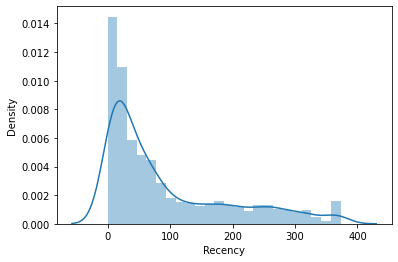

In [12]:
RFM_model['Recency'].describe()

import seaborn as sb
x = RFM_model['Recency']
ax = sb.distplot(x)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


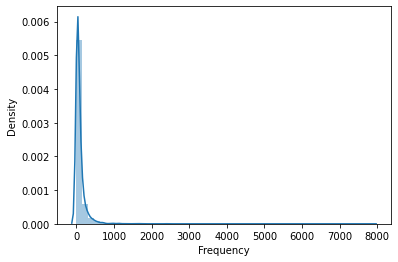

In [13]:
#Frequency distribution plot which is smaller than 1500
import seaborn as sb
x = RFM_model['Frequency']
ax = sb.distplot(x)

In [14]:
#Split into four segments using quantiles
quantiles = RFM_model.quantile(q=[0.25, 0.5, 0.75])
quantiles = quantiles.to_dict()
quantiles

{'Frequency': {0.25: 17.0, 0.5: 41.0, 0.75: 99.0},
 'Monetary': {0.25: 300.03999999999996,
  0.5: 651.8199999999999,
  0.75: 1575.8899999999999},
 'Recency': {0.25: 17.0, 0.5: 50.0, 0.75: 142.0}}

In [15]:
#Create R, F, M segments
def RScore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
def FnMScore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

In [16]:
RFM_model['R']= RFM_model['Recency'].apply(RScore, args=('Recency',quantiles,))
RFM_model['M']= RFM_model['Monetary'].apply(FnMScore, args=('Monetary',quantiles,))
RFM_model['F']= RFM_model['Frequency'].apply(FnMScore, args=('Frequency',quantiles,))
RFM_model.head()

,Recency,Frequency,Monetary,R,M,F
CustomerID,,,,,,
12346.0,325,1,77183.60,4,1,4
12747.0,2,103,4196.01,1,1,1
12748.0,0,4596,33719.73,1,1,1
12749.0,3,199,4090.88,1,1,1
12820.0,3,59,942.34,1,2,2


In [17]:
RFM_model['RFMGroup']= RFM_model.R.map(str) + RFM_model.M.map(str) + RFM_model.F.map(str)

RFM_model['RFMScore']= RFM_model.R + RFM_model.M + RFM_model.F
RFM_model

,Recency,Frequency,Monetary,R,M,F,RFMGroup,RFMScore
CustomerID,,,,,,,,
12346.0,325,1,77183.60,4,1,4,414,9
12747.0,2,103,4196.01,1,1,1,111,3
12748.0,0,4596,33719.73,1,1,1,111,3
12749.0,3,199,4090.88,1,1,1,111,3
12820.0,3,59,942.34,1,2,2,122,5
...,...,...,...,...,...,...,...,...
18280.0,277,10,180.60,4,4,4,444,12
18281.0,180,7,80.82,4,4,4,444,12
18282.0,7,12,178.05,1,4,4,144,9


In [18]:
RFM_new_table= RFM_model[['R', 'F', 'M', 'RFMGroup', 'RFMScore']]
RFM_new_table

,R,F,M,RFMGroup,RFMScore
CustomerID,,,,,
12346.0,4,4,1,414,9
12747.0,1,1,1,111,3
12748.0,1,1,1,111,3
12749.0,1,1,1,111,3
12820.0,1,2,2,122,5
...,...,...,...,...,...
18280.0,4,4,4,444,12
18281.0,4,4,4,444,12
18282.0,1,4,4,144,9


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


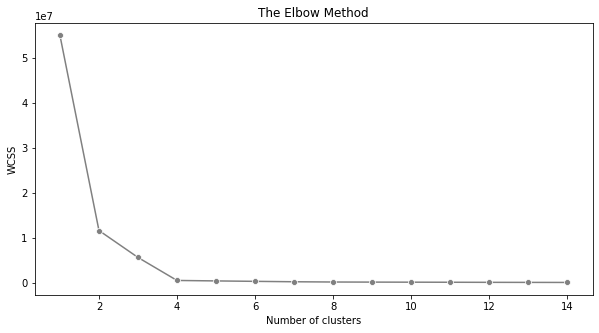

In [19]:
import seaborn as sns
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters = i, random_state = 42).fit(RFM_new_table)
    # inertia method returns wcss for that model
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10,5))
sns.lineplot(range(1, 15), wcss,marker='o',color='grey')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [20]:
RFM_new_table


,R,F,M,RFMGroup,RFMScore
CustomerID,,,,,
12346.0,4,4,1,414,9
12747.0,1,1,1,111,3
12748.0,1,1,1,111,3
12749.0,1,1,1,111,3
12820.0,1,2,2,122,5
...,...,...,...,...,...
18280.0,4,4,4,444,12
18281.0,4,4,4,444,12
18282.0,1,4,4,144,9


In [21]:
#5 According to the Elbow graph we deterrmine the clusters number as #5. Applying k-means algorithm to the X dataset.
kmeans = KMeans(n_clusters=4, init ='k-means++',random_state=42 )
# We are going to use the fit predict method that returns for each #observation which cluster it belongs to. The cluster to which #client belongs and it will return this cluster numbers into a #single vector that is  called y K-means
y_kmeans = kmeans.fit(RFM_new_table)

#Find the clusters for the observation given in the dataset
RFM_new_table['Cluster'] = y_kmeans.labels_
RFM_new_table

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,R,F,M,RFMGroup,RFMScore,Cluster
CustomerID,,,,,,
12346.0,4,4,1,414,9,1
12747.0,1,1,1,111,3,2
12748.0,1,1,1,111,3,2
12749.0,1,1,1,111,3,2
12820.0,1,2,2,122,5,2
...,...,...,...,...,...,...
18280.0,4,4,4,444,12,1
18281.0,4,4,4,444,12,1
18282.0,1,4,4,144,9,2


In [22]:
#PCA giúp chiều dữ liệu để có thể visulaize trên descartes, bởi nếu để như bảng trên sẽ có tới 4 dimension => ko thể visualize 1 cách trực quan. 
#Do đó ta phải giảm chiều dl bằng 2
from sklearn.decomposition import PCA
pca = PCA(n_components=2).fit(RFM_new_table)
pca_2d = pca.transform(RFM_new_table)
pca_2d

array([[ 137.44262719,    1.50685541],
       [-165.63901764,    1.6195836 ],
       [-165.63901764,    1.6195836 ],
       ...,
       [-132.50068156,   -5.07323255],
       [-165.63901764,    1.6195836 ],
       [ -64.61158706,    1.5266504 ]])

In [23]:
#Dl gốc thuộc dạng dataframe, ko thể sd thuật toán như array để check vtri các label nên ta đổi dataframe 
arrRFM = RFM_new_table.to_numpy()

In [24]:
arrRFM
print(arrRFM[:,5])

[1 2 2 ... 2 2 0]


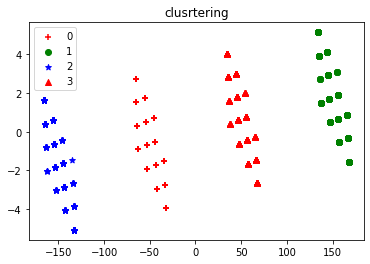

In [25]:
import pylab as pl
for i in range(0, pca_2d.shape[0]):
  if arrRFM[:,5][i] == 0:
    c1 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='r',marker='+')
  elif arrRFM[:,5][i] == 1:
    c2 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='g',marker='o')
  elif arrRFM[:,5][i] == 2:
    c3 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='b',marker='*')
  elif arrRFM[:,5][i] == 3:
    c4 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='r',marker='^')
pl.legend([c1, c2, c3,c4], ['0', '1','2','3'])
pl.title('clusrtering')
pl.show()

In [43]:
#Assign Loyalty Level to each customer
Loyalty_Level = ['Platinum', 'Gold', 'Silver', 'Bronze']
Score_cuts = pd.qcut(RFM_model.RFMScore, q = 4, labels = Loyalty_Level)
RFM_model['RFM_Loyalty_Level'] = Score_cuts.values
RFM_model.reset_index()

,CustomerID,Recency,Frequency,Monetary,R,M,F,RFMGroup,RFMScore,Segment,RFM_Loyalty_Level
0,12346.0,325,1,77183.60,4,1,4,414,9,High-spending customer,Silver
1,12747.0,2,103,4196.01,1,1,1,111,3,Champions,Platinum
2,12748.0,0,4596,33719.73,1,1,1,111,3,Champions,Platinum
3,12749.0,3,199,4090.88,1,1,1,111,3,Champions,Platinum
4,12820.0,3,59,942.34,1,2,2,122,5,Loyal customer,Platinum
...,...,...,...,...,...,...,...,...,...,...,...
3916,18280.0,277,10,180.60,4,4,4,444,12,Lost customer,Bronze
3917,18281.0,180,7,80.82,4,4,4,444,12,Lost customer,Bronze
3918,18282.0,7,12,178.05,1,4,4,144,9,New customer,Silver
3919,18283.0,3,756,2094.88,1,1,1,111,3,Champions,Platinum


In [44]:
seg_map = {
    r'111' : 'Champions',
    r'[1-2][1-2][1-2]' : 'Loyal customer',
    r'1[3-4][3-4]' :'New customer',
    r'[1-4][1-2]4' : ' High-spending customer',
    r'[1-2][3-4][1-2]' : 'Lowest-spending Active Loyal customer',
    r'4[1-2][1-2]' : 'Churned best customer',
    r'444' : 'Lost customer' ,
    r'[1-4][1-4][1-4]' :'Other'
}

RFM_model['Segment'] = RFM_model['RFMGroup'].astype(str) 
RFM_model['Segment'] = RFM_model['Segment'].replace(seg_map, regex=True)

RFM_model

,Recency,Frequency,Monetary,R,M,F,RFMGroup,RFMScore,Segment,RFM_Loyalty_Level
CustomerID,,,,,,,,,,
12346.0,325,1,77183.60,4,1,4,414,9,High-spending customer,Silver
12747.0,2,103,4196.01,1,1,1,111,3,Champions,Platinum
12748.0,0,4596,33719.73,1,1,1,111,3,Champions,Platinum
12749.0,3,199,4090.88,1,1,1,111,3,Champions,Platinum
12820.0,3,59,942.34,1,2,2,122,5,Loyal customer,Platinum
...,...,...,...,...,...,...,...,...,...,...
18280.0,277,10,180.60,4,4,4,444,12,Lost customer,Bronze
18281.0,180,7,80.82,4,4,4,444,12,Lost customer,Bronze
18282.0,7,12,178.05,1,4,4,144,9,New customer,Silver


In [45]:
#Calculate average values for each RFM score
RFM_agg = RFM_model.groupby('Segment').agg({
    'Recency' : 'mean',
    'Frequency' : 'mean',
    'Monetary' : ['mean','count']
}).round(1)
print(RFM_agg)

                                      Recency Frequency Monetary      
                                         mean      mean     mean count
Segment                                                               
 High-spending customer                 107.8       9.1   4445.0   111
Champions                                 6.6     363.7   8218.2   409
Churned best customer                   206.3     102.4   1508.1   105
Lost customer                           257.9       8.1    152.3   343
Lowest-spending Active Loyal customer    21.7      77.0    420.6   175
Loyal customer                           22.3     132.0   2336.4   761
New customer                              9.4      18.6    314.2   167
Other                                   114.9      40.0    723.9  1850


In [35]:
!pip install squarify

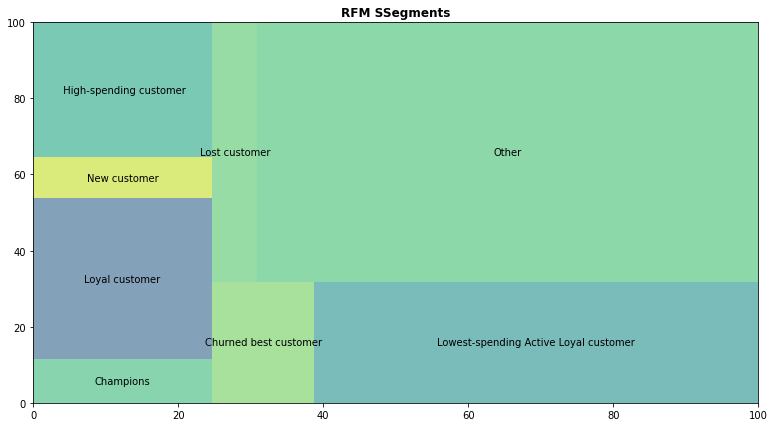

In [46]:
import squarify
RFM_agg.columns= ['Recencymean','Frequencymean','Monetarymean','Count']
#Create plot
fig= plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(13,7)
squarify.plot(sizes= RFM_agg['Count'],
              label=['Champions',
                     'Loyal customer',
                     'New customer',
                     ' High-spending customer',
                     'Churned best customer',
                     'Lowest-spending Active Loyal customer',
                     'Lost customer', 
                     'Other'], alpha=.6)
plt.title("RFM SSegments", fontweight="bold")
plt.axis('on')
plt.show()                      

